<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Superanfitriones??" data-toc-modified-id="Superanfitriones??-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Superanfitriones??</a></span></li><li><span><a href="#Valores-nulos-tratamiento" data-toc-modified-id="Valores-nulos-tratamiento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Valores nulos tratamiento</a></span></li><li><span><a href="#Lugares-disponibles??" data-toc-modified-id="Lugares-disponibles??-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lugares disponibles??</a></span></li><li><span><a href="#Duplicados" data-toc-modified-id="Duplicados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Duplicados</a></span></li><li><span><a href="#Availability-365" data-toc-modified-id="Availability-365-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Availability 365</a></span></li><li><span><a href="#Precio-barrios" data-toc-modified-id="Precio-barrios-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Precio barrios</a></span></li><li><span><a href="#Reseñas" data-toc-modified-id="Reseñas-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reseñas</a></span></li><li><span><a href="#service-fee" data-toc-modified-id="service-fee-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>service fee</a></span></li></ul></div>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/airbnb_sample.csv")

### Superanfitriones??

No tengo claro como distinguir a los superanfitriones con los datos que tenemos

Normal, no parece posible. Puedes responder esta otra pregunta:

- Pregunta 5c.2: Crea una visualización para comparar, al menos, dos variables diferentes entre anfitriones verificados y no verificados.

In [4]:
df.shape

(10000, 26)

In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
df.host_identity_verified.value_counts()

verified       5031
unconfirmed    4931
Name: host_identity_verified, dtype: int64

### Valores nulos tratamiento

Cuando piden imputar valores que consideremos, habría que completar todos los nulos? Puedo eliminar las filas nulas en "last review" o "number of reviews"?

Hazlo a tu elección. Puedes elegir 2 o 3 columnas e imputarlas según tu criterio:
 - fill rápido
 - media / mediana
 - media / mediana por categoría
 - ...

### Lugares disponibles??

Crea un gráfico de líneas para mostrar la cantidad total de lugares disponibles al año.

Normal, no parece posible. Puedes responder esta otra pregunta:

- Pregunta 5b.2: Crea un gráfico de líneas para mostrar la cantidad total de casas construidas cada año.

### Duplicados

Al buscar duplicados, hay 3615 filas completamente duplicadas. Debería eliminar sólo los que están completamente duplicados o los que tengan "NAME" duplicados?

A tu criterio, puede ser:
 - totalmente iguales
 - NAME, aunque parece muy poco conservador
 - lat, long
 - ...

In [21]:
df.duplicated().sum()

4

In [33]:
df.duplicated(["lat", "long"]).sum()

431

### Availability 365

Algunos comentarios

In [51]:
(df["availability 365"] < 0).sum()

34

In [54]:
df.loc[df["availability 365"] < 0, "availability 365"] = 0

In [56]:
df.loc[df["availability 365"] >365, "availability 365"] = 365

In [55]:
(df["availability 365"] < 0).sum()

0

In [57]:
(df["availability 365"] > 365).sum()

0

In [59]:
import seaborn as sns

In [69]:
df["av_group"] = pd.cut(df["availability 365"], [-1, 100, 200, 300, 400])

In [75]:
df[["availability 365", "av_group"]].head()

,availability 365,av_group
0,0.0,"(-1, 100]"
1,52.0,"(-1, 100]"
2,116.0,"(100, 200]"
3,365.0,"(300, 400]"
4,29.0,"(-1, 100]"


In [72]:
df.av_group.value_counts().sort_index()

(-1, 100]     5038
(100, 200]    1546
(200, 300]    1335
(300, 400]    2042
Name: av_group, dtype: int64

<AxesSubplot: xlabel='av_group', ylabel='count'>

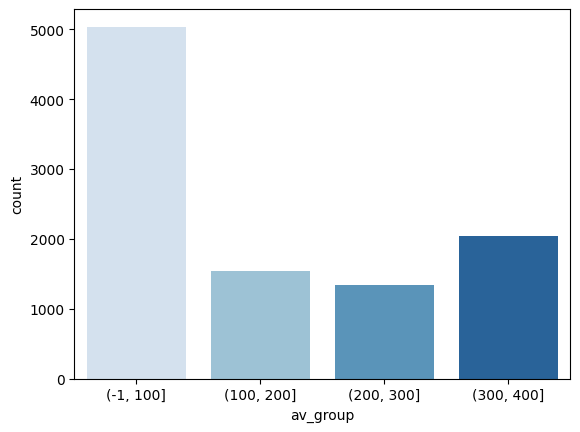

In [74]:
sns.countplot(x=df.av_group, palette="Blues")

### Precio barrios

En la consigna 4.3, enumerar precio por barrio. Se refiere a enumerar todos los barrios y poner su precio medio o hacer sólo un precio medio de todos los barrios?

A lo primero. La solución es: un número para cada barrio

Puedes tener que usar `df.price.str.replace(...)`

La pregunta dice: Enumera el precio medio por barrio y señala cuál es el conjunto de barrios más caro para alquilar. ¿Enumere es crear un rank?

4.3 pide enumerar y sacar el top, osea que sí, rankear

### Reseñas

¿Podrías explicar esto? Crea una visualización de datos de tu elección utilizando una de las columnas de reseñas, de forma aislada o en combinación con otra columna

In [77]:
[col for col in df.columns if "rev" in col]

['number of reviews', 'last review', 'reviews per month', 'review rate number']

In [78]:
df[['number of reviews', 'last review', 'reviews per month', 'review rate number']]

,number of reviews,last review,reviews per month,review rate number
0,9.0,5/20/2018,0.39,5.0
1,6.0,6/30/2019,0.23,5.0
2,0.0,NaN,NaN,1.0
3,0.0,NaN,NaN,3.0
4,2.0,6/29/2019,2.00,4.0
...,...,...,...,...
9995,0.0,NaN,NaN,2.0
9996,0.0,NaN,NaN,2.0
9997,15.0,6/27/2019,1.77,3.0
9998,9.0,2/28/2022,2.43,2.0


<AxesSubplot: xlabel='review rate number', ylabel='count'>

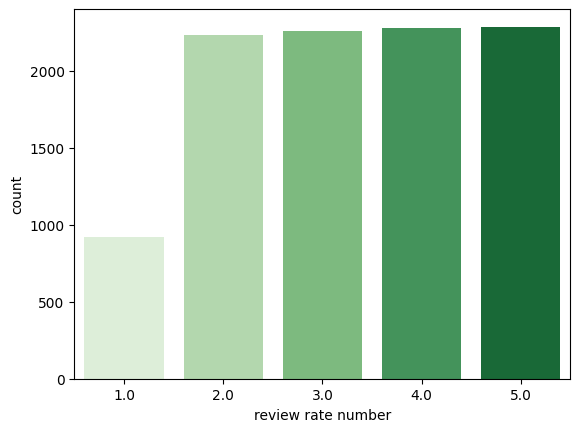

In [81]:
sns.countplot(x=df["review rate number"], palette="Greens")

<AxesSubplot: xlabel='review rate number', ylabel='count'>

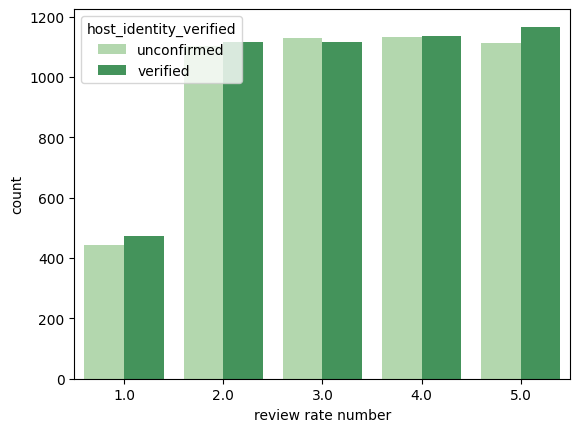

In [82]:
sns.countplot(x=df["review rate number"], hue=df.host_identity_verified, palette="Greens")

In [87]:
df.groupby("neighbourhood group")["review rate number"].mean().round(2).sort_values()

neighbourhood group
manhatan         3.00
Staten Island    3.19
Manhattan        3.26
Brooklyn         3.27
Bronx            3.28
Queens           3.36
Name: review rate number, dtype: float64

### service fee

La columna "service_fee" es tarifa de limpieza?

Sí